In [ ]:
# Connect to drive to access the data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import packages
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from imblearn.over_sampling import BorderlineSMOTE
from sklearn.preprocessing import StandardScaler
from collections import Counter
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA, TruncatedSVD
import torch
from torch import nn, optim
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader, SubsetRandomSampler
import random
from keras.layers import Input, Dense
from keras.models import Model
from keras import regularizers
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras.models import Model, load_model
from keras.callbacks import EarlyStopping

from fastprogress import master_bar, progress_bar
from IPython.display import display

import warnings
warnings.filterwarnings('ignore')

import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)

import plotly.io as pio
pio.renderers.default = 'colab'

In [ ]:
!unzip /content/drive/MyDrive/archive.zip

Archive:  /content/drive/MyDrive/archive.zip
  inflating: creditcard.csv          


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/creditcard.csv")
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,-1.416907,-0.153826,-0.751063,0.167372,0.050144,-0.443587,0.002821,-0.611987,-0.045575,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,-0.619468,0.291474,1.757964,-1.323865,0.686133,-0.076127,-1.222127,-0.358222,0.324505,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,-0.705117,-0.110452,-0.286254,0.074355,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,1.017614,0.836390,1.006844,-0.443523,0.150219,0.739453,-0.540980,0.476677,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [ ]:
print(df.shape)

(284807, 31)


In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,1.673327e-15,-1.247012e-15,8.190001e-16,1.207294e-15,4.887456e-15,1.437716e-15,-3.772171e-16,9.564149e-16,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
# Check the distribution of the target variable
print(df['Class'].value_counts())

Class
0    284315
1       492
Name: count, dtype: int64


In [ ]:
# Minor preprocessing to make sure time is representated within a 24-hour cycle.
df['Time'] = df['Time'] / 3600 % 24

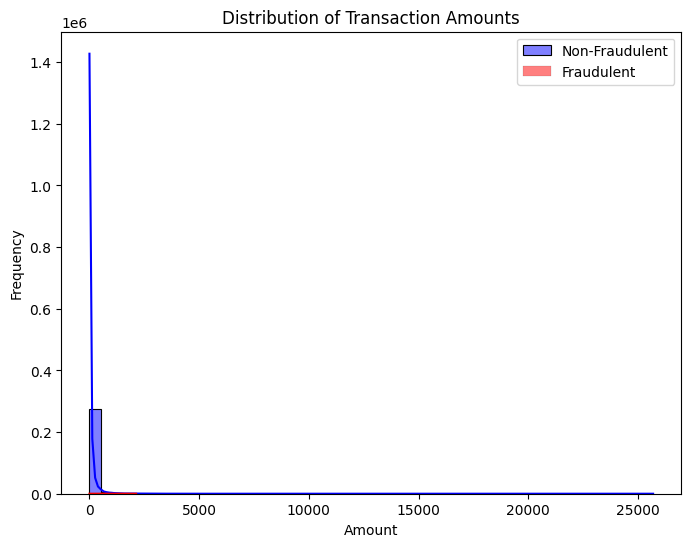

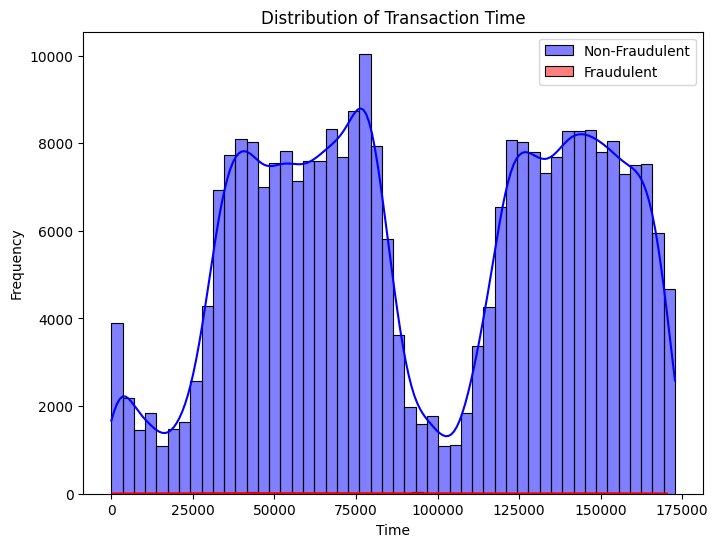

In [ ]:
# Visualize the distribution of transaction amounts for each class
plt.figure(figsize=(8, 6))
sns.histplot(df[df['Class'] == 0]['Amount'], bins=50, kde=True, color='blue', label='Non-Fraudulent')
sns.histplot(df[df['Class'] == 1]['Amount'], bins=50, kde=True, color='red', label='Fraudulent')
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Visualize the distribution of transaction time for each class
plt.figure(figsize=(8, 6))
sns.histplot(df[df['Class'] == 0]['Time'], bins=50, kde=True, color='blue', label='Non-Fraudulent')
sns.histplot(df[df['Class'] == 1]['Time'], bins=50, kde=True, color='red', label='Fraudulent')
plt.title('Distribution of Transaction Time')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [ ]:
# Check if there is null values
df.isnull().sum().max()

0

In [ ]:
df.isnull().values.any()

False

In [ ]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
print(len(df.columns))

31


In [ ]:
# The classes are heavily imbalanced
print('Non Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

Non Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


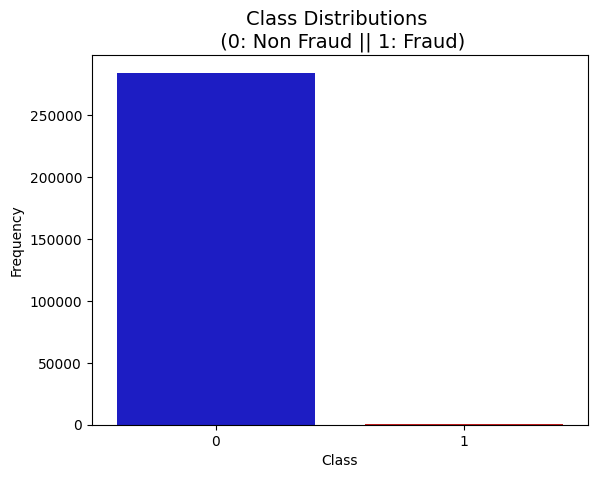

In [ ]:
# Class distribution

colors = ["#0101DF", "#DF0101"]

sns.countplot(x = 'Class', data=df, palette=colors)
plt.title('Class Distributions \n (0: Non Fraud || 1: Fraud)', fontsize=14)
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

In [ ]:
frauds = df[df.Class == 1]
non_fraud = df[df.Class == 0]

print(frauds.shape)
print(non_fraud.shape)

(492, 31)
(284315, 31)


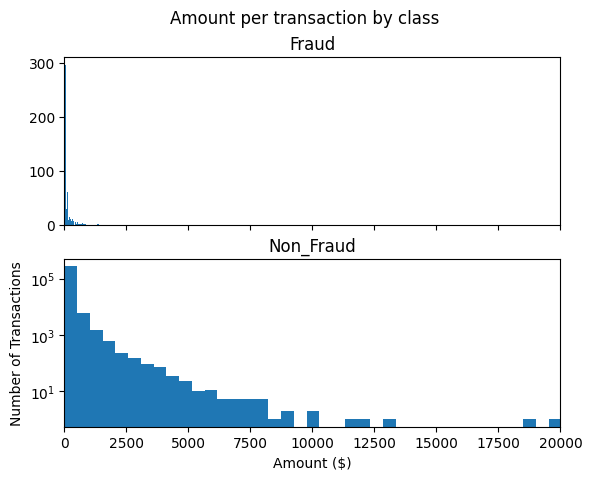

In [ ]:
# Visualize the amount per transaction

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(frauds.Amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(non_fraud.Amount, bins = bins)
ax2.set_title('Non_Fraud')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show()

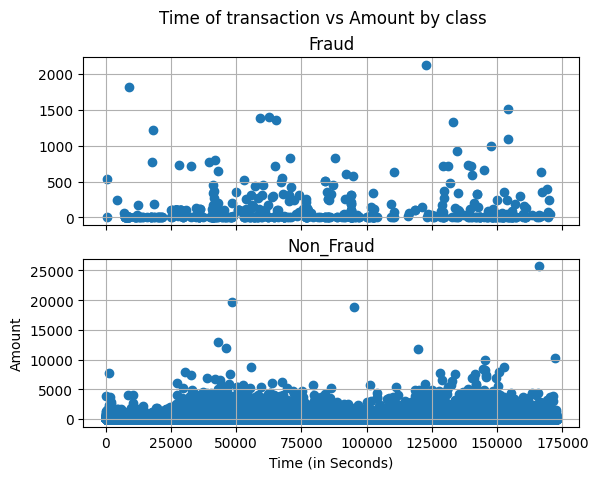

In [ ]:
# Visualize to see if fraudulent transactions occur more often during certain time
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(frauds.Time, frauds.Amount)
ax1.set_title('Fraud')
ax1.grid(True)

ax2.scatter(non_fraud.Time, non_fraud.Amount)
ax2.set_title('Non_Fraud')
ax2.grid(True)

plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

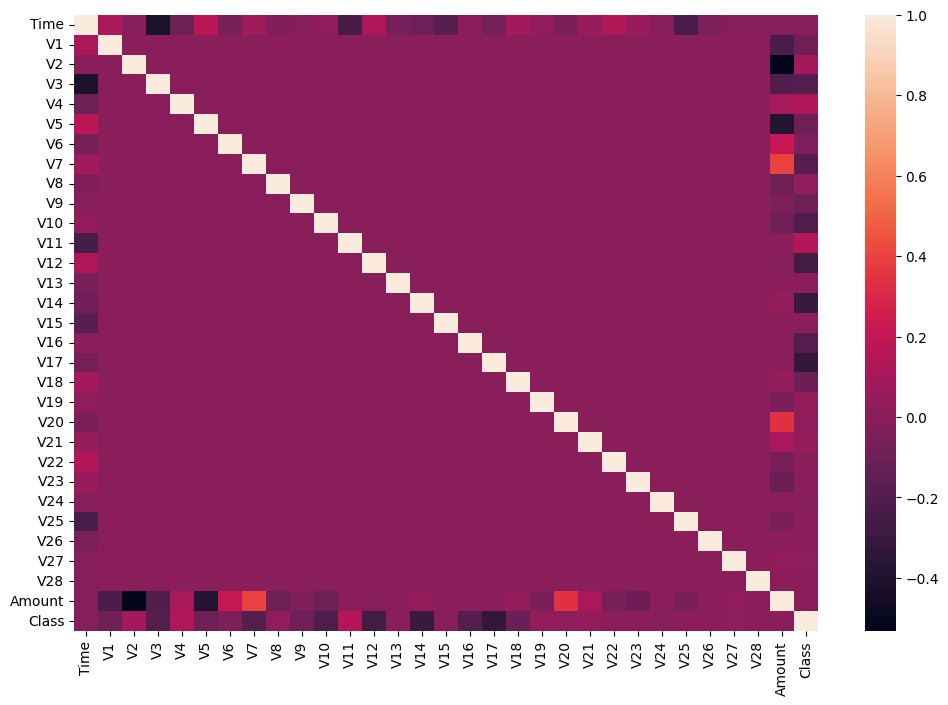

Note :-A correlation of 0 means that no relationship exists between the two variables, whereas a correlation of 1 indicates a perfect positive relationship.


In [ ]:
plt.figure(figsize=(12,8))

sns.heatmap(df.corr())
plt.show()

print("Note :-A correlation of 0 means that no relationship exists between the two variables, whereas a correlation of 1 indicates a perfect positive relationship.")


In [ ]:
# Visualize the data with TSNE and PCA

def plot_scatter(X, y, mode='TSNE', fname='file.png'):
    if mode == 'TSNE':
        X_r = TSNE(n_components=2, random_state=SEED).fit_transform(X)
    elif mode == 'PCA':
        X_r = PCA(n_components=2, random_state=SEED).fit_transform(X)
    elif mode == 'TSVD':
        X_r = TruncatedSVD(n_components=2, random_state=SEED).fit_transform(X)
    else:
        print('[ERROR]: Please select a valid mode')
        return

    traces = []
    traces.append(go.Scatter(x=X_r[y == 0, 0], y=X_r[y == 0, 1], mode='markers', showlegend=True, name='Non Fraud'))
    traces.append(go.Scatter(x=X_r[y == 1, 0], y=X_r[y == 1, 1], mode='markers', showlegend=True, name='Fraud'))

    layout = dict(title=f'{mode} plot')
    fig = go.Figure(data=traces, layout=layout)
    py.iplot(fig, filename=fname)

In [ ]:
# Taking the transaction samples from the dataset

fraud = df.loc[df['Class'] == 1]
non_fraud = df.loc[df['Class'] == 0].sample(3000)

new_df = pd.concat([fraud, non_fraud]).sample(frac=1.).reset_index(drop=True)
y = new_df.pop('Class')

In [ ]:
plot_scatter(new_df, y, mode='TSNE', fname='tsne1.png')

In [ ]:
plot_scatter(new_df, y, mode='PCA', fname='pca1.png')

In [ ]:
plot_scatter(new_df, y, mode='TSVD', fname='tsvd1.png')

In [ ]:
# Preprocessing the data
df['Amount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1, 1))
df['Time']= StandardScaler().fit_transform(df['Time'].values.reshape(-1, 1))
df = df.drop(['Time'], axis=1)

In [ ]:
# Split the data into training and testing sets with a proportion of 80-20%
X = df.drop(['Class'], axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to numpy arrays, if not already done
X_train = X_train.values
y_train = y_train.values
X_test = X_test.values
y_test = y_test.values

In [ ]:
"""# Split the data into training and testing sets with a proportion of 80-20%
X = df.drop(['Class'], axis=1)
y = df['Class']
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# For autoencoder (using only non-fraudulent transactions from the training set)
X_train = X_train_full[y_train_full == 0]

# Convert to numpy arrays, if not already done
X_train_full = X_train_full.values
y_train_full = y_train_full.values
X_train = X_train.values
X_test = X_test.values
y_test = y_test.values"""


In [ ]:
"""# Split the data into training and testing sets with a proportion of 80-20%
X_train, X_test = train_test_split(df, test_size=0.2, random_state=SEED)
X_train = X_train[X_train.Class == 0]
X_train = X_train.drop(['Class'], axis=1)

y_test = X_test['Class']
X_test = X_test.drop(['Class'], axis=1)

# Convert to numpy arrays, if needed for your model input format
X_train = X_train.values
X_test = X_test.values"""

In [ ]:
"""# Split the data into training and testing set with proportion of 80-20%

X_train, X_test = train_test_split(df, train_size=0.8, random_state=SEED)
# X_train, X_test = train_test_split(X_train, train_size=0.8, random_state=0)

# Separate classes for training
X_train_non_fraud = X_train[X_train['Class'] == 0]
X_train_fraud = X_train[X_train['Class'] == 1]

# Drop 'Class' column for both sets
X_train_non_fraud = X_train_non_fraud.drop(['Class'], axis=1)
X_train_fraud = X_train_fraud.drop(['Class'], axis=1)
X_test = X_test.drop(['Class'], axis=1)

# Convert to numpy arrays
X_train_non_fraud = X_train_non_fraud.values
X_train_fraud = X_train_fraud.values
X_test = X_test.values

# Now you can concatenate both non-fraudulent and fraudulent examples for training
X_train_combined = np.concatenate((X_train_non_fraud, X_train_fraud), axis=0)
y_train_combined = np.concatenate((np.zeros(X_train_non_fraud.shape[0]), np.ones(X_train_fraud.shape[0])), axis=0)"""

In [ ]:
X_train.shape

(227845, 29)

In [ ]:
X_test.shape

(56962, 29)

In [ ]:
# Check the ratios after split
print("Train Ratio:", round(len(X_train) / len(df), 2) * 100, "%")
# print("Validation Ratio:", round(len(X_test) / len(df), 2) * 100, "%")
print("Test Ratio:", round(len(X_test) / len(df), 2) * 100, "%")

Train Ratio: 80.0 %
Test Ratio: 20.0 %


In [ ]:
# Apply Borderline SMOTE to balance our data to ensure that the model has enough exposure to both classes

borderlineSMOTE = BorderlineSMOTE (k_neighbors=10, random_state= 42 )

X_train_with_smote, y_train_with_smote = borderlineSMOTE.fit_resample(X_train,y_train)

print('Original dataset shape %s' % Counter(y_train))
print('Resampled dataset shape %s' % Counter(y_train_with_smote))

Original dataset shape Counter({0: 227451, 1: 394})
Resampled dataset shape Counter({0: 227451, 1: 227451})


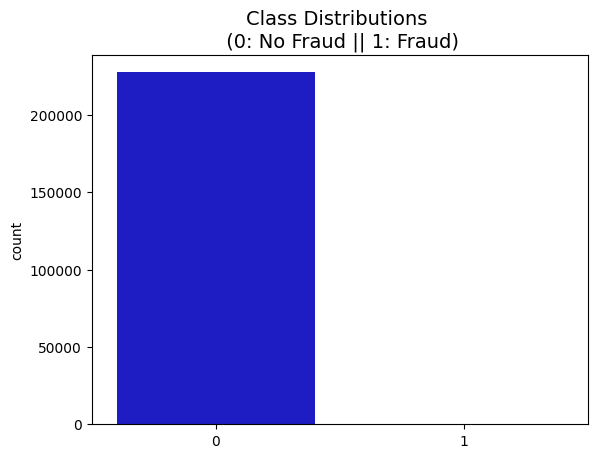

In [ ]:
# Unbalanced training data class distribution - Before BorderlineSMOTE

colors = ["#0101DF", "#DF0101"]

sns.countplot(x=y_train, palette=colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)
plt.show()


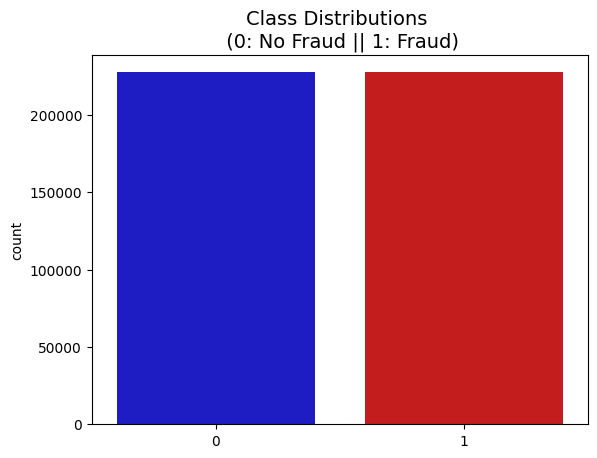

In [ ]:
# Balanced training data class distribution - After BorderlineSMOTE
colors = ["#0101DF", "#DF0101"]

sns.countplot(x=y_train_with_smote, palette=colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)
plt.show()


In [ ]:
from keras.models import Model
from keras.layers import Input, Dense, Dropout, BatchNormalization
from keras import regularizers
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard
from keras.models import load_model
import keras
from keras.layers import Input, Dense, Dropout, BatchNormalization
from keras.models import Model, load_model
from keras.regularizers import l1
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, TensorBoard
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
from keras.models import load_model
from keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import Sequential
import tensorflow as tf
import keras
from keras import layers

In [ ]:
# Building the MLP model
mlp_classifier = Sequential([
    Dense(256, input_dim=X_train_with_smote.shape[1], activation='relu', name='dense1'),
    Dropout(0.5, name='dropout1'),  # Adding dropout to prevent overfitting
    Dense(128, activation='relu', name='dense2'),
    Dropout(0.5, name='dropout2'),
    Dense(64, activation='relu', name='dense3'),
    Dropout(0.3, name='dropout3'),
    Dense(1, activation='sigmoid', name='output')  # Output layer for binary classification
])

# Compile the model
mlp_classifier.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Define callbacks for the MLP as well
mlp_checkpointer = ModelCheckpoint(filepath="mlp_model.h5", verbose=0, save_best_only=True)
mlp_early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)

# Train the MLP model
mlp_history = mlp_classifier.fit(X_train_with_smote, y_train_with_smote,
                                 epochs=50,
                                 batch_size=512,
                                 shuffle=True,
                                validation_data=(X_test, y_test),
                                 verbose=1,
                                 callbacks=[mlp_checkpointer, mlp_early_stopping]).history

# Load the best model
try:
    mlp_classifier = load_model('mlp_model.h5')
except Exception as e:
    print(f"Error loading the MLP model: {e}")

# Evaluate the MLP model
mlp_test_loss, mlp_test_acc = mlp_classifier.evaluate(X_test, y_test, verbose=0)
print(f"MLP Test Loss: {mlp_test_loss}, MLP Test Accuracy: {mlp_test_acc}")

Epoch 1/50
889/889 [==============================] - 11s 11ms/step - loss: 0.0400 - accuracy: 0.9859 - val_loss: 0.0163 - val_accuracy: 0.9966
Epoch 2/50
889/889 [==============================] - 10s 11ms/step - loss: 0.0093 - accuracy: 0.9982 - val_loss: 0.0088 - val_accuracy: 0.9987
Epoch 3/50
889/889 [==============================] - 11s 12ms/step - loss: 0.0063 - accuracy: 0.9989 - val_loss: 0.0073 - val_accuracy: 0.9990
Epoch 4/50
889/889 [==============================] - 9s 10ms/step - loss: 0.0051 - accuracy: 0.9992 - val_loss: 0.0070 - val_accuracy: 0.9990
Epoch 5/50
889/889 [==============================] - 11s 12ms/step - loss: 0.0042 - accuracy: 0.9993 - val_loss: 0.0062 - val_accuracy: 0.9989
Epoch 6/50
889/889 [==============================] - 10s 11ms/step - loss: 0.0037 - accuracy: 0.9994 - val_loss: 0.0069 - val_accuracy: 0.9991
Epoch 7/50
889/889 [==============================] - 9s 11ms/step - loss: 0.0037 - accuracy: 0.9994 - val_loss: 0.0050 - val_accuracy: 0

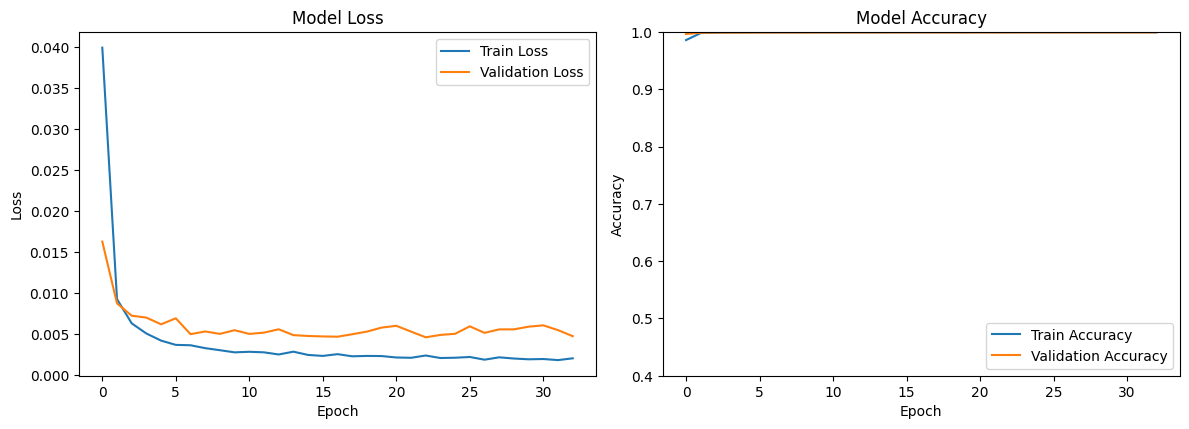

In [ ]:
import matplotlib.pyplot as plt

# Ensure history is correctly referenced
history = mlp_history

# Plot training & validation loss values
plt.figure(figsize=(12, 12))
plt.subplot(321)
plt.plot(history['loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

# Plot training & validation accuracy values
plt.subplot(322)
plt.plot(history['accuracy'], label='Train Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.ylim(0.4, 1.0)  # Adjusted upper limit to 1.0 as accuracy should not exceed 1
plt.legend(loc='lower right')

plt.tight_layout()  # This can help prevent overlap of elements
plt.show()


1781/1781 [==============================] - 3s 2ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.77      0.82      0.79        98

    accuracy                           1.00     56962
   macro avg       0.88      0.91      0.90     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix:
[[56840    24]
 [   18    80]]
ROC AUC Score: 0.9800481707877298


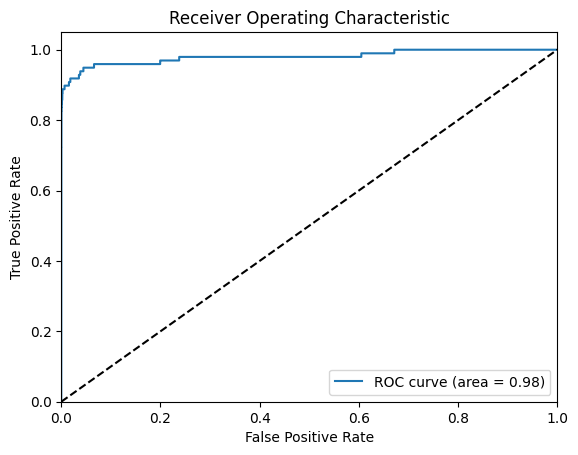

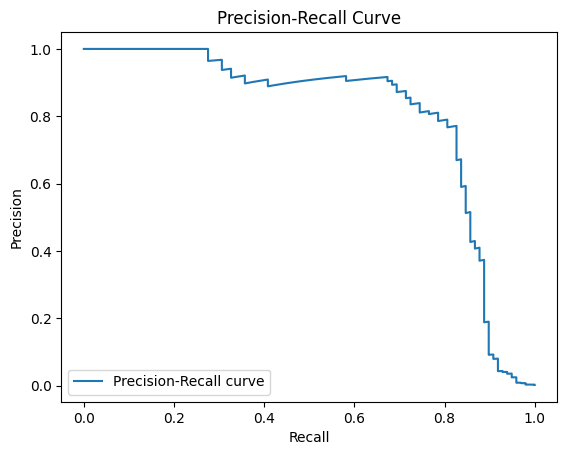

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt

# Predict probabilities for the test set
y_pred_probs = mlp_classifier.predict(X_test)

# Predict classes based on a threshold
threshold = 0.5  # This threshold can be adjusted based on the precision-recall trade-offs
y_pred = (y_pred_probs >= threshold).astype(int)

# Calculate different metrics
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_probs))

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_probs)
plt.figure()
plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

In [ ]:
# Building Autoencoder Model

# Input layer
input_dim = X_train_with_smote.shape[1]

# Encoder
encoding_dim = int(input_dim / 2) - 1
input_layer = Input(shape=(input_dim, ), name='Input')

encoder = Dense(encoding_dim, activation="tanh",
                activity_regularizer=regularizers.l1(10e-5), name='encoder1')(input_layer)
encoder = BatchNormalization(name='bn_encoder1')(encoder)
encoder = Dense(int(encoding_dim / 2), activation="relu", name='encoder2')(encoder)
encoder = Dropout(0.2, name='dropout_encoder1')(encoder)  # Dropout layer for regularization
encoder = Dense(int(encoding_dim / 4), activation="tanh", name='encoder3')(encoder)  # Additional encoder layer

# Decoder
decoder = Dense(int(encoding_dim / 4), activation='tanh', name='decoder1')(encoder)
decoder = Dropout(0.2, name='dropout_decoder1')(decoder)  # Dropout layer for regularization
decoder = Dense(int(encoding_dim / 2), activation='relu', name='decoder2')(decoder)
decoder = BatchNormalization(name='bn_decoder1')(decoder)
decoder = Dense(input_dim, activation='sigmoid', name='decoder3')(decoder)  # Using sigmoid for the final layer

# Autoencoder Model
autoencoder = Model(inputs=input_layer, outputs=decoder)


In [ ]:
# Model overview
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 29)]              0         
                                                                 
 encoder1 (Dense)            (None, 13)                390       
                                                                 
 bn_encoder1 (BatchNormaliz  (None, 13)                52        
 ation)                                                          
                                                                 
 encoder2 (Dense)            (None, 6)                 84        
                                                                 
 dropout_encoder1 (Dropout)  (None, 6)                 0         
                                                                 
 encoder3 (Dense)            (None, 3)                 21        
                                                             

In [ ]:
# Training parameters
nb_epoch = 50
batch_size = 512

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

# Define callbacks
checkpointer = ModelCheckpoint(filepath="model.h5", verbose=0, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
tensorboard = TensorBoard(log_dir='./logs', histogram_freq=0, write_graph=True, write_images=True)

# Train the model
history = autoencoder.fit(X_train_with_smote, X_train_with_smote,
                          epochs=nb_epoch,
                          batch_size=batch_size,
                          shuffle=True,
                          validation_data=(X_test, X_test),
                          verbose=1,
                          callbacks=[checkpointer, tensorboard]).history

# Safely load the trained model
try:
    autoencoder = load_model('model.h5')
except Exception as e:
    print(f"Error loading the model: {e}")

Epoch 1/50
446/446 [==============================] - 6s 6ms/step - loss: 1.2172 - accuracy: 0.1406 - val_loss: 1.0586 - val_accuracy: 0.2710
Epoch 2/50
446/446 [==============================] - 2s 5ms/step - loss: 1.0518 - accuracy: 0.3557 - val_loss: 0.9964 - val_accuracy: 0.4203
Epoch 3/50
446/446 [==============================] - 2s 5ms/step - loss: 1.0246 - accuracy: 0.3898 - val_loss: 0.9839 - val_accuracy: 0.4114
Epoch 4/50
446/446 [==============================] - 3s 7ms/step - loss: 1.0159 - accuracy: 0.3877 - val_loss: 0.9758 - val_accuracy: 0.4214
Epoch 5/50
446/446 [==============================] - 3s 6ms/step - loss: 1.0103 - accuracy: 0.3835 - val_loss: 0.9705 - val_accuracy: 0.4193
Epoch 6/50
446/446 [==============================] - 3s 6ms/step - loss: 1.0067 - accuracy: 0.3825 - val_loss: 0.9686 - val_accuracy: 0.4188
Epoch 7/50
446/446 [==============================] - 2s 6ms/step - loss: 1.0049 - accuracy: 0.3791 - val_loss: 0.9659 - val_accuracy: 0.4145
Epoch 

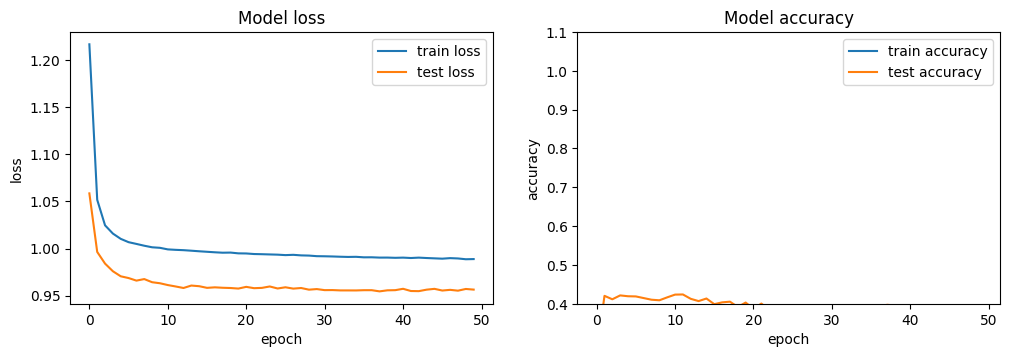

In [ ]:
# Plot training & validation loss values
plt.figure(figsize=(12,12))
plt.subplot(321)
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train loss', 'test loss']);#loc='upper right'

# Plot training & validation accuracy values
plt.subplot(322)
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.ylim(0.4,1.1)
plt.legend(['train accuracy','test accuracy']);#loc='upper right'

In [ ]:
# Evaluate model
print("Test Loss and Accuracy:")
test_loss, test_acc = autoencoder.evaluate(X_test, X_test, verbose=0)  # using X_test as both input and output
print(f"Loss: {test_loss}, Accuracy: {test_acc}")


Test Loss and Accuracy:
Loss: 0.9544204473495483, Accuracy: 0.3972823917865753


In [ ]:
# Evaluating the reconstruction error on the test set
reconstructed = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - reconstructed, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                         'true_class': y_test})

1781/1781 [==============================] - 5s 2ms/step


In [ ]:
error_df.describe()

,reconstruction_error,true_class
count,56962.000000,56962.000000
mean,0.953567,0.001720
std,3.745311,0.041443
min,0.093524,0.000000
25%,0.323033,0.000000
50%,0.539969,0.000000
75%,0.827869,0.000000
max,258.695478,1.000000


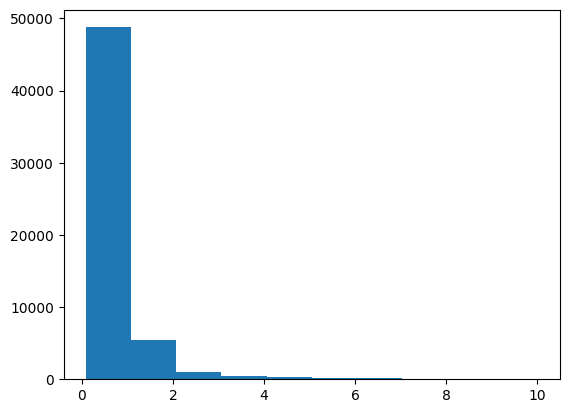

In [ ]:
# Reconstruction error without fraud
fig = plt.figure()
ax = fig.add_subplot(111)
normal_error_df = error_df[(error_df['true_class']== 0) & (error_df['reconstruction_error'] < 10)]
_ = ax.hist(normal_error_df.reconstruction_error.values, bins=10)

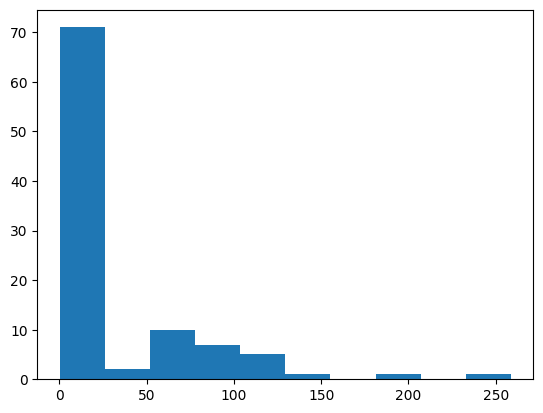

In [ ]:
# Reconstruction error with fraud
fig = plt.figure()
ax = fig.add_subplot(111)
fraud_error_df = error_df[error_df['true_class'] == 1]
_ = ax.hist(fraud_error_df.reconstruction_error.values, bins=10)

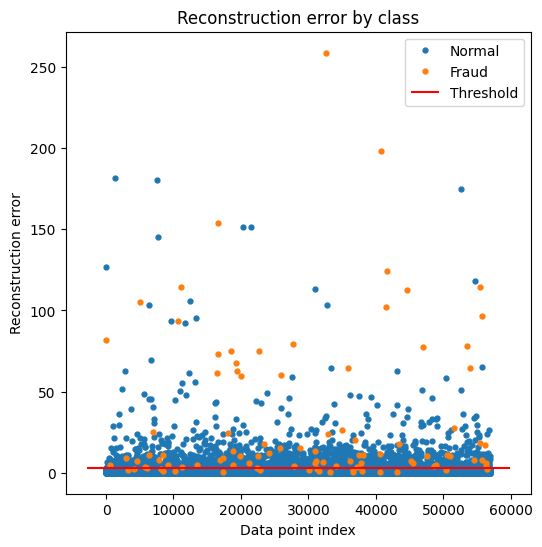

In [ ]:
# Plot reconstruction error
threshold = 2.9
fig, ax = plt.subplots(figsize=(6, 6))
groups = error_df.groupby('true_class')
for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label="Fraud" if name == 1 else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error by class")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();


In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

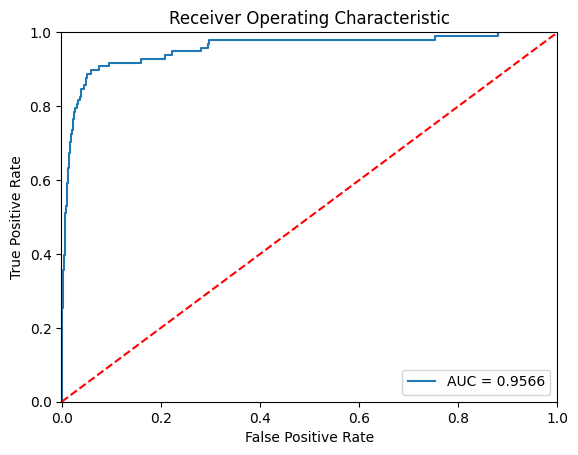

In [ ]:
fpr, tpr, thresholds = roc_curve(error_df.true_class, error_df.reconstruction_error)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

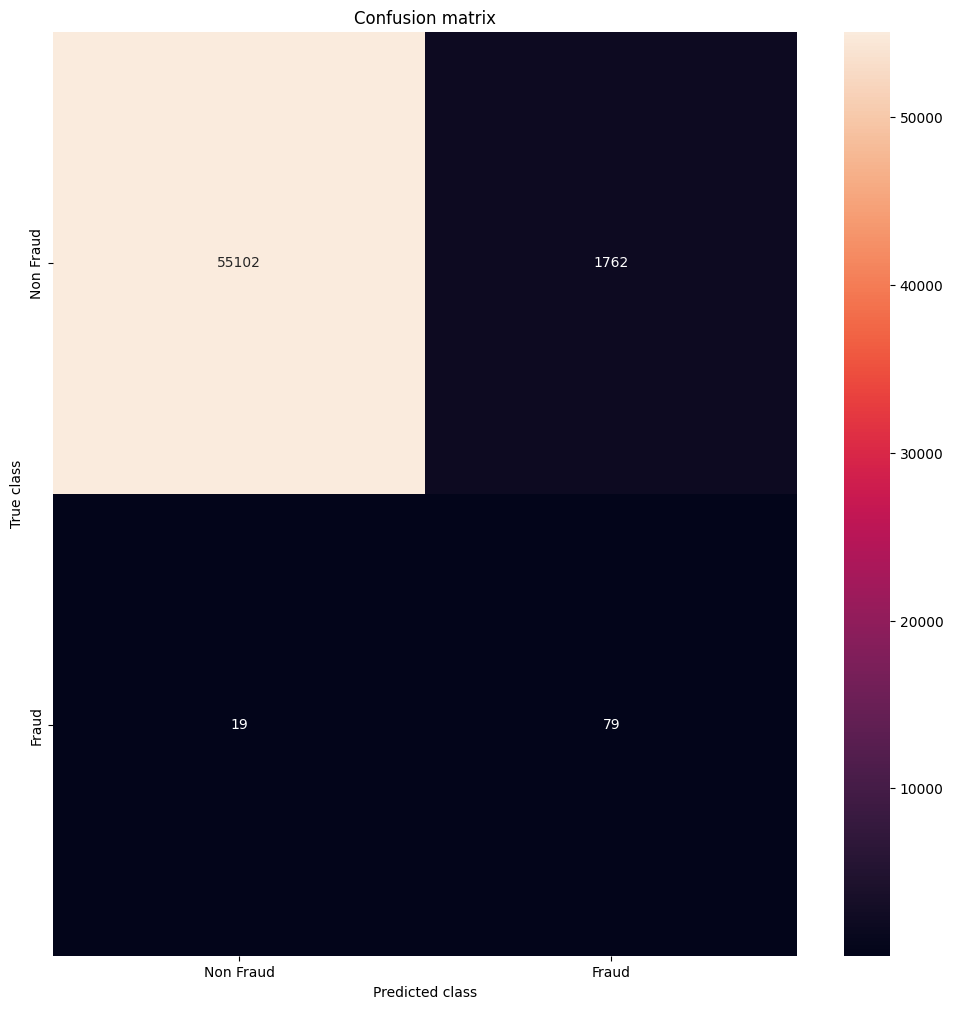

In [ ]:
LABELS = ['Non Fraud', 'Fraud']
y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)

plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [ ]:
import keras
from keras.layers import Input, Dense, Dropout, BatchNormalization
from keras.models import Model, load_model
from keras.regularizers import l1
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, TensorBoard
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
from keras.models import load_model
from keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import Sequential
import tensorflow as tf
import keras
from keras import layers

In [ ]:
# Encoder Model for generating encoded features
encoder_model = Model(inputs=input_layer, outputs=encoder)

In [ ]:
# Generate encoded features of the autoencoder to transform the training data, which will then be used to train a Multilayer Perceptron (MLP).
X_train_encoded = encoder_model.predict(X_train_with_smote)
X_test_encoded = encoder_model.predict(X_test)


1781/1781 [==============================] - 4s 2ms/step


In [ ]:
# Building the MLP model
mlp_classifier = Sequential([
    Dense(256, input_dim=X_train_encoded.shape[1], activation='relu', name='dense1'),
    Dropout(0.5, name='dropout1'),  # Adding dropout to prevent overfitting
    Dense(128, activation='relu', name='dense2'),
    Dropout(0.5, name='dropout2'),
    Dense(64, activation='relu', name='dense3'),
    Dropout(0.3, name='dropout3'),
    Dense(1, activation='sigmoid', name='output')  # Output layer for binary classification
])

# Compile the model
mlp_classifier.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Define callbacks for the MLP as well
mlp_checkpointer = ModelCheckpoint(filepath="mlp_model.h5", verbose=0, save_best_only=True)
mlp_early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)

# Train the MLP model
mlp_history = mlp_classifier.fit(X_train_encoded, y_train_with_smote,
                                 epochs=50,
                                 batch_size=512,
                                 shuffle=True,
                                validation_data=(X_test_encoded, y_test),
                                 verbose=1,
                                 callbacks=[mlp_checkpointer, mlp_early_stopping]).history

# Load the best model
try:
    mlp_classifier = load_model('mlp_model.h5')
except Exception as e:
    print(f"Error loading the MLP model: {e}")

# Evaluate the MLP model
mlp_test_loss, mlp_test_acc = mlp_classifier.evaluate(X_test_encoded, y_test, verbose=0)
print(f"MLP Test Loss: {mlp_test_loss}, MLP Test Accuracy: {mlp_test_acc}")



Epoch 1/50
446/446 [==============================] - 11s 16ms/step - loss: 0.0273 - accuracy: 0.9973 - val_loss: 0.0103 - val_accuracy: 0.9983
Epoch 2/50
446/446 [==============================] - 5s 10ms/step - loss: 0.0099 - accuracy: 0.9983 - val_loss: 0.0087 - val_accuracy: 0.9983
Epoch 3/50
446/446 [==============================] - 7s 17ms/step - loss: 0.0091 - accuracy: 0.9983 - val_loss: 0.0083 - val_accuracy: 0.9983
Epoch 4/50
446/446 [==============================] - 8s 17ms/step - loss: 0.0089 - accuracy: 0.9983 - val_loss: 0.0080 - val_accuracy: 0.9983
Epoch 5/50
446/446 [==============================] - 8s 17ms/step - loss: 0.0086 - accuracy: 0.9983 - val_loss: 0.0076 - val_accuracy: 0.9983
Epoch 6/50
446/446 [==============================] - 6s 12ms/step - loss: 0.0085 - accuracy: 0.9983 - val_loss: 0.0076 - val_accuracy: 0.9983
Epoch 7/50
446/446 [==============================] - 7s 17ms/step - loss: 0.0083 - accuracy: 0.9983 - val_loss: 0.0075 - val_accuracy: 0.998

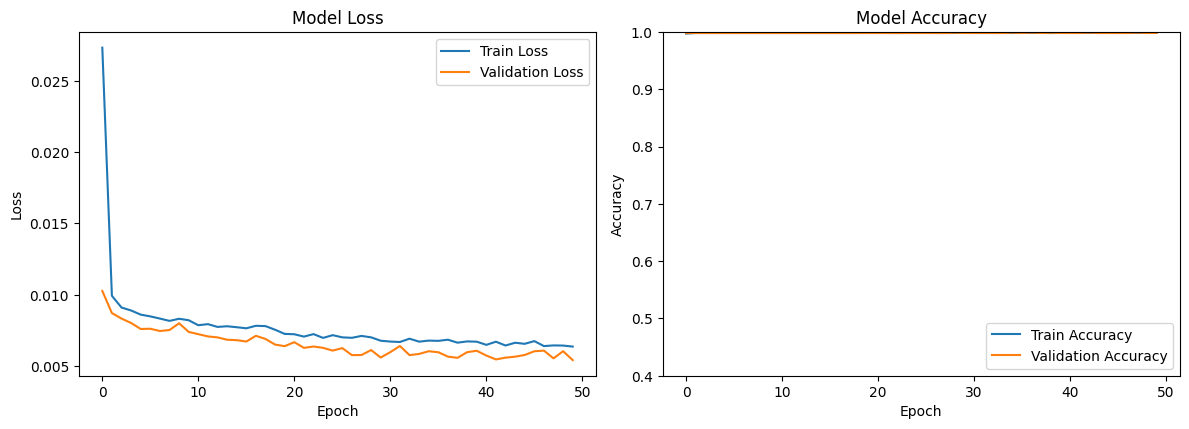

In [ ]:
history = mlp_history

# Plot training & validation loss values
plt.figure(figsize=(12, 12))
plt.subplot(321)
plt.plot(history['loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

# Plot training & validation accuracy values
plt.subplot(322)
plt.plot(history['accuracy'], label='Train Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.ylim(0.4, 1.0)  # Adjusted upper limit to 1.0 as accuracy should not exceed 1
plt.legend(loc='lower right')

plt.tight_layout()  # This can help prevent overlap of elements
plt.show()

1781/1781 [==============================] - 3s 2ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.64      0.14      0.23        98

    accuracy                           1.00     56962
   macro avg       0.82      0.57      0.62     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix:
[[56856     8]
 [   84    14]]
ROC AUC Score: 0.9398481554270556


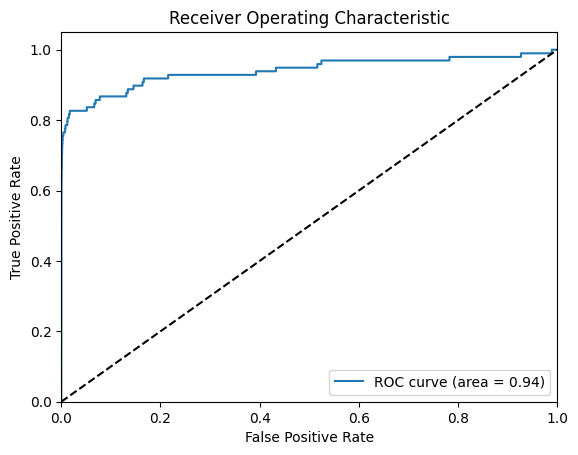

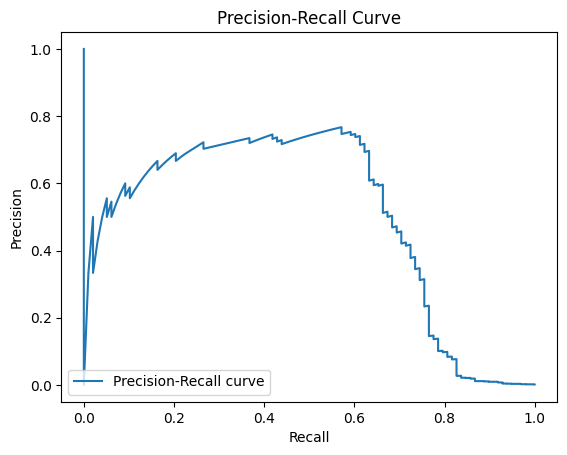

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt

# Predict probabilities for the test set
y_pred_probs = mlp_classifier.predict(X_test_encoded)

# Predict classes based on a threshold
threshold = 0.5  # This threshold can be adjusted based on the precision-recall trade-offs
y_pred = (y_pred_probs >= threshold).astype(int)

# Calculate different metrics
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_probs))

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_probs)
plt.figure()
plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()


1781/1781 [==============================] - 6s 3ms/step
Confusion Matrix:
 [[56856     8]
 [   84    14]]


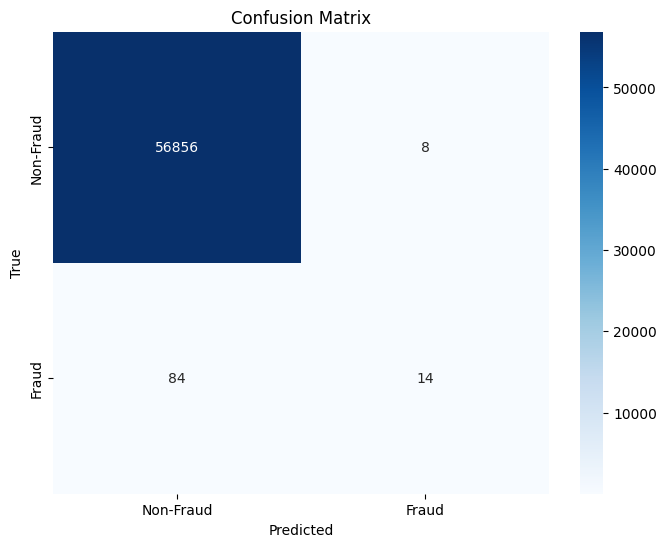

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.64      0.14      0.23        98

    accuracy                           1.00     56962
   macro avg       0.82      0.57      0.62     56962
weighted avg       1.00      1.00      1.00     56962



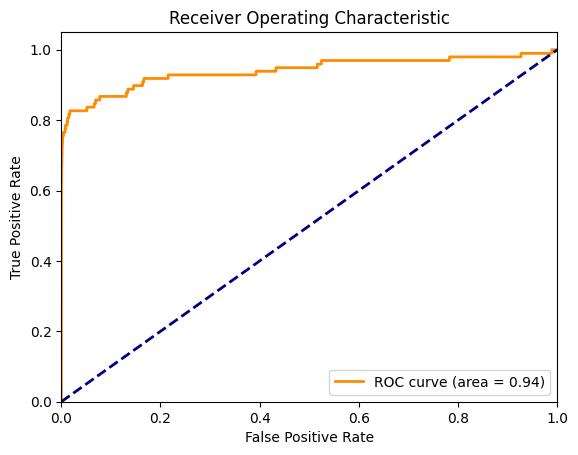

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt


# Load the model
model = load_model('mlp_model.h5')

# # Predict probabilities
y_pred_probs = model.predict(X_test_encoded)
y_pred = (y_pred_probs > 0.5).astype(int)  # Using threshold of 0.5, adjust as needed

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Plotting confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print(classification_report(y_test, y_pred))

# Optional: Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()




In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import BorderlineSMOTE
from collections import Counter
from keras.layers import Input, Dense, Lambda
from keras.models import Model
from keras import backend as K
from keras import metrics
from keras import regularizers
from keras.models import Sequential, load_model
from keras.layers import Dropout
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.losses import mse
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Input, Dense, Lambda, BatchNormalization, Activation
from tensorflow.keras.models import Model
from tensorflow.keras.losses import mse, binary_crossentropy
from tensorflow.keras import backend as K
from tensorflow.keras.losses import MeanSquaredError


In [ ]:
# Building VAEs Model

def sampling(args):
    z_mean, z_log_var = args
    batch = K.shape(z_mean)[0]
    dim = K.int_shape(z_mean)[1]
    epsilon = K.random_normal(shape=(batch, dim))
    return z_mean + K.exp(0.5 * z_log_var) * epsilon

# Network parameters
input_shape = (X_train_with_smote.shape[1], )
intermediate_dim = 512
latent_dim = 2
batch_size = 512
epochs = 50

# Encoder
inputs = Input(shape=input_shape, name='encoder_input')
x = Dense(intermediate_dim, activation='relu')(inputs)
x = BatchNormalization()(x)
z_mean = Dense(latent_dim, name='z_mean')(x)
z_log_var = Dense(latent_dim, name='z_log_var')(x)
z = Lambda(sampling, output_shape=(latent_dim,), name='z')([z_mean, z_log_var])
encoder = Model(inputs, [z_mean, z_log_var, z], name='encoder')

# Decoder
latent_inputs = Input(shape=(latent_dim,), name='z_sampling')
x = Dense(intermediate_dim, activation='relu')(latent_inputs)
x = BatchNormalization()(x)
outputs = Dense(input_shape[0], activation='sigmoid')(x)
decoder = Model(latent_inputs, outputs, name='decoder')

# VAE Model
outputs = decoder(encoder(inputs)[2])
vae = Model(inputs, outputs, name='vae_mlp')

# Loss function
reconstruction_loss = mse(inputs, outputs) * input_shape[0]
kl_loss = 1 + z_log_var - K.square(z_mean) - K.exp(z_log_var)
kl_loss = K.sum(kl_loss, axis=-1) * -0.5
vae_loss = K.mean(reconstruction_loss + kl_loss)
vae.add_loss(vae_loss)
vae.compile(optimizer='adam', metrics=['accuracy'])
vae.summary()

# Model summary
vae.summary()

Model: "vae_mlp"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 encoder_input (InputLayer)  [(None, 29)]                 0         []                            
                                                                                                  
 encoder (Functional)        [(None, 2),                  19460     ['encoder_input[0][0]']       
                              (None, 2),                                                          
                              (None, 2)]                                                          
                                                                                                  
 decoder (Functional)        (None, 29)                   18461     ['encoder[0][2]']             
                                                                                            

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.models import load_model

# Define callbacks for early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=10, mode='min', verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.0001, mode='min', verbose=1)

# Train the model
history = vae.fit(X_train_with_smote, X_train_with_smote,
                  epochs=epochs,
                  batch_size=batch_size,
                  validation_data=(X_test, X_test),
                  callbacks=[early_stopping, reduce_lr])

# Save the trained model
vae.save('model.h5', save_format='tf')

# Safely load the trained model
try:
    autoencoder = load_model('model.h5')
    print("Model loaded successfully.")
except Exception as e:
    print(f"Error loading the model: {e}")


Epoch 1/50
446/446 [==============================] - 15s 27ms/step - loss: 32.1014 - accuracy: 0.3274 - val_loss: 30.5886 - val_accuracy: 0.4003 - lr: 0.0010
Epoch 2/50
446/446 [==============================] - 11s 26ms/step - loss: 30.3658 - accuracy: 0.4151 - val_loss: 30.0059 - val_accuracy: 0.4218 - lr: 0.0010
Epoch 3/50
446/446 [==============================] - 12s 28ms/step - loss: 30.2512 - accuracy: 0.4223 - val_loss: 29.8703 - val_accuracy: 0.4231 - lr: 0.0010
Epoch 4/50
446/446 [==============================] - 13s 28ms/step - loss: 30.1464 - accuracy: 0.4263 - val_loss: 29.5833 - val_accuracy: 0.4198 - lr: 0.0010
Epoch 5/50
446/446 [==============================] - 11s 24ms/step - loss: 30.0728 - accuracy: 0.4283 - val_loss: 29.5919 - val_accuracy: 0.4236 - lr: 0.0010
Epoch 6/50
446/446 [==============================] - 14s 32ms/step - loss: 30.0774 - accuracy: 0.4319 - val_loss: 29.4933 - val_accuracy: 0.4359 - lr: 0.0010
Epoch 7/50
446/446 [==========================

Model loaded successfully.


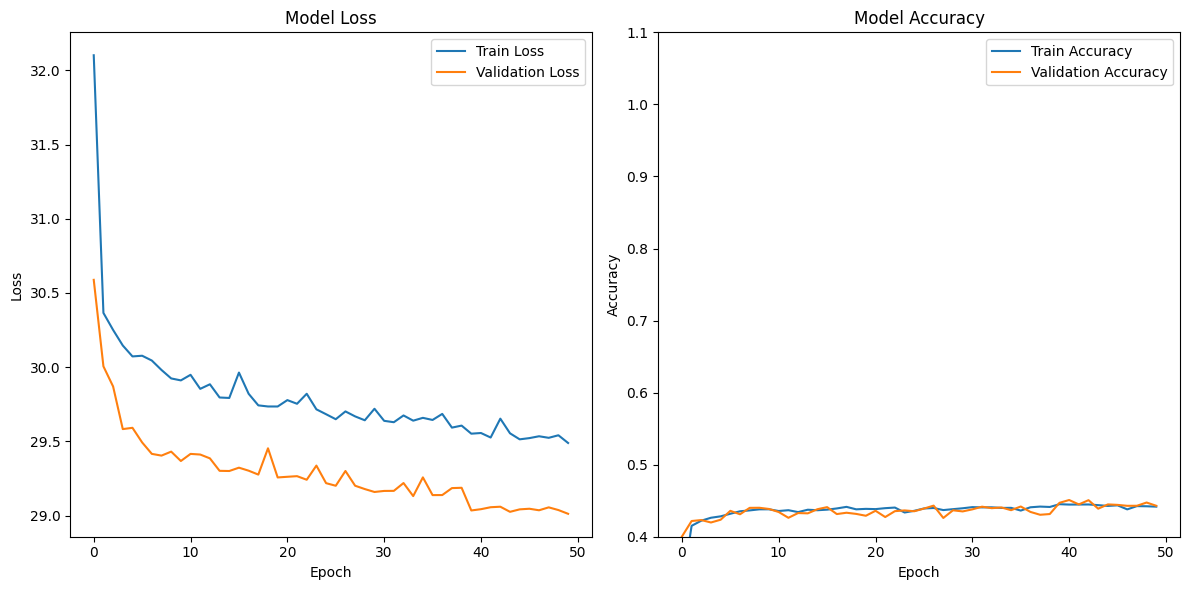

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(12, 6))  # Adjusted figure size for 1x2 layout
plt.subplot(121)  # Adjusted for a 1x2 layout
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

# Plot training & validation accuracy values
plt.subplot(122)  # Adjusted for a 1x2 layout
if 'accuracy' in history.history:  # Check if 'accuracy' is available in history
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.ylim(0.4, 1.1)  # Set limits for y-axis
    plt.legend(loc='upper right')
else:
    print("Accuracy metrics not available in history.")
plt.tight_layout()
plt.show()

In [ ]:
# Evaluate model
print("Test Loss and Accuracy:")
test_loss, test_acc = vae.evaluate(X_test, X_test, verbose=0)  # using X_test as both input and output
print(f"Loss: {test_loss}, Accuracy: {test_acc}")


Test Loss and Accuracy:
Loss: 29.041900634765625, Accuracy: 0.4429619610309601


In [ ]:
# Evaluating the reconstruction error on the test set
reconstructed = vae.predict(X_test)
mse = np.mean(np.power(X_test - reconstructed, 2), axis=1)
error_df1 = pd.DataFrame({'reconstruction_error': mse,
                         'true_class': y_test})

1781/1781 [==============================] - 5s 3ms/step


In [ ]:
error_df1.describe()

,reconstruction_error,true_class
count,56962.000000,56962.000000
mean,0.934498,0.001720
std,3.701371,0.041443
min,0.091665,0.000000
25%,0.338949,0.000000
50%,0.523643,0.000000
75%,0.803971,0.000000
max,259.702191,1.000000


In [ ]:
print("Full Sample",error_df1.describe())
error_df_true = error_df1[(error_df1['true_class']== 0)]
print("Normal Sample",error_df_true.describe())
error_df_false = error_df1[(error_df1['true_class']== 1)]
print("Fraud Sample",error_df_false.describe())

Full Sample        reconstruction_error    true_class
count          56962.000000  56962.000000
mean               0.934498      0.001720
std                3.701371      0.041443
min                0.091665      0.000000
25%                0.338949      0.000000
50%                0.523643      0.000000
75%                0.803971      0.000000
max              259.702191      1.000000
Normal Sample        reconstruction_error  true_class
count          56864.000000     56864.0
mean               0.882351         0.0
std                2.913999         0.0
min                0.091665         0.0
25%                0.338741         0.0
50%                0.522743         0.0
75%                0.801933         0.0
max              179.209476         0.0
Fraud Sample        reconstruction_error  true_class
count             98.000000        98.0
mean              31.192943         1.0
std               46.267628         0.0
min                0.254234         1.0
25%                4.51

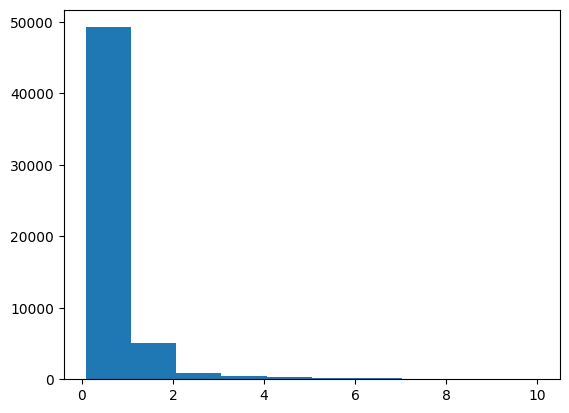

In [ ]:
# Reconstruction error without fraud
fig = plt.figure()
ax = fig.add_subplot(111)
normal_error_df = error_df1[(error_df1['true_class']== 0) & (error_df1['reconstruction_error'] < 10)]
_ = ax.hist(normal_error_df.reconstruction_error.values, bins=10)

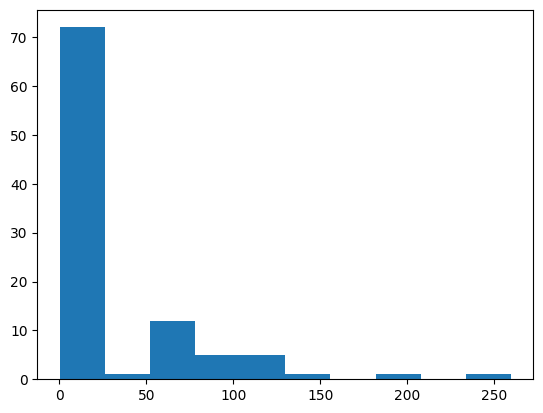

In [ ]:
# Reconstruction error with fraud
fig = plt.figure()
ax = fig.add_subplot(111)
fraud_error_df = error_df1[error_df1['true_class'] == 1]
_ = ax.hist(fraud_error_df.reconstruction_error.values, bins=10)

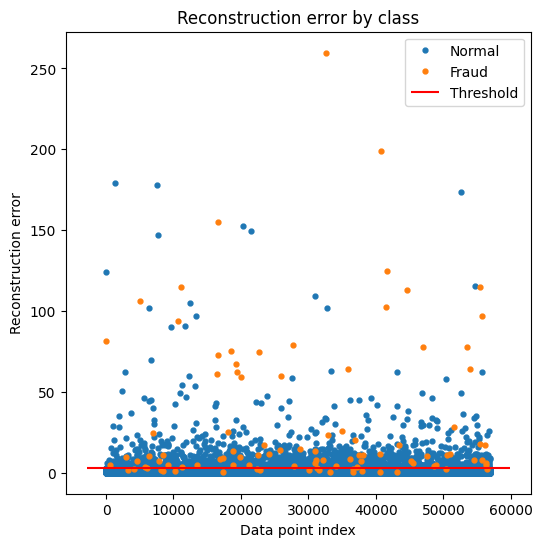

In [ ]:
# Plot reconstruction error
threshold = 2.9
fig, ax = plt.subplots(figsize=(6, 6))
groups = error_df1.groupby('true_class')
for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label="Fraud" if name == 1 else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error by class")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();


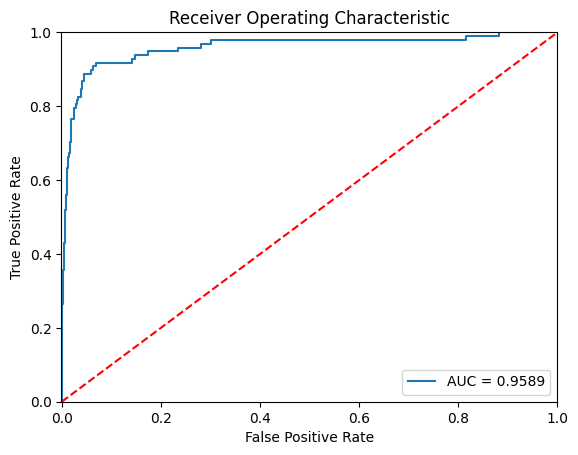

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(error_df1.true_class, error_df1.reconstruction_error)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

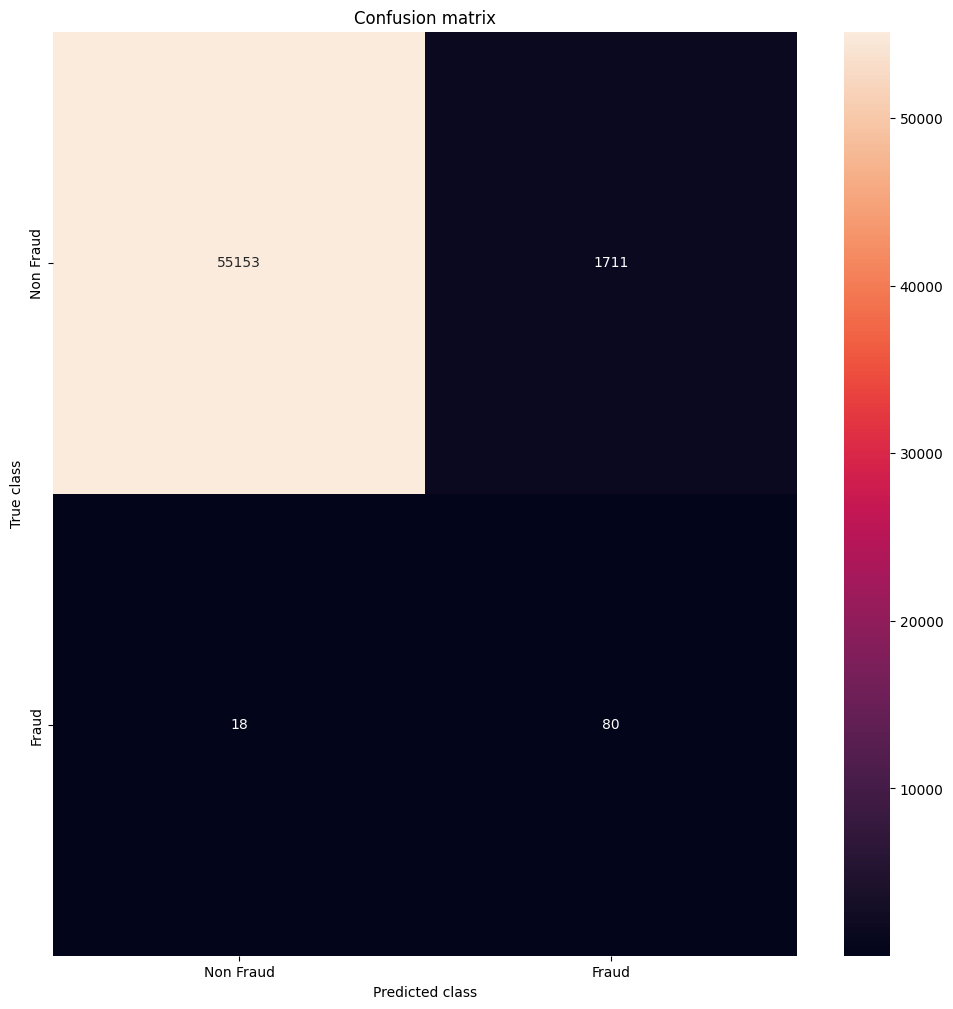

In [ ]:
LABELS = ['Non Fraud', 'Fraud']
y_pred = [1 if e > threshold else 0 for e in error_df1.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df1.true_class, y_pred)

plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [ ]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Get encoded data for MLP
X_train_encoded = encoder.predict(X_train_with_smote)[0]
X_test_encoded = encoder.predict(X_test)[0]

# Building the MLP model
mlp_classifier = Sequential([
    Dense(256, input_dim=latent_dim, activation='relu', name='dense1'),
    Dropout(0.5, name='dropout1'),
    Dense(128, activation='relu', name='dense2'),
    Dropout(0.5, name='dropout2'),
    Dense(64, activation='relu', name='dense3'),
    Dropout(0.3, name='dropout3'),
    Dense(1, activation='sigmoid', name='output')
])

# Compile the MLP model
mlp_classifier.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Define callbacks for the MLP
mlp_checkpointer = ModelCheckpoint(filepath="./mlp_model.h5", verbose=1, save_best_only=True)
mlp_early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)

# Train the MLP model
mlp_history = mlp_classifier.fit(X_train_encoded, y_train_with_smote,
                                  epochs=50,
                                  batch_size=512,
                                  shuffle=True,
                                  validation_data=(X_test_encoded, y_test),
                                  verbose=1,
                                  callbacks=[mlp_checkpointer, mlp_early_stopping])

# Load the best model
try:
    mlp_classifier = load_model('./mlp_model.h5')
    print("MLP model loaded successfully.")
except Exception as e:
    print(f"Error loading the MLP model: {e}")

# Evaluate the MLP model
mlp_test_loss, mlp_test_acc = mlp_classifier.evaluate(X_test_encoded, y_test, verbose=0)
print(f"MLP Test Loss: {mlp_test_loss}, MLP Test Accuracy: {mlp_test_acc}")

1781/1781 [==============================] - 4s 2ms/step
Epoch 1/50
442/446 [============================>.] - ETA: 0s - loss: 0.0294 - accuracy: 0.9965
Epoch 1: val_loss improved from inf to 0.00774, saving model to ./mlp_model.h5
446/446 [==============================] - 6s 10ms/step - loss: 0.0292 - accuracy: 0.9965 - val_loss: 0.0077 - val_accuracy: 0.9985
Epoch 2/50
445/446 [============================>.] - ETA: 0s - loss: 0.0061 - accuracy: 0.9989
Epoch 2: val_loss improved from 0.00774 to 0.00667, saving model to ./mlp_model.h5
446/446 [==============================] - 6s 14ms/step - loss: 0.0061 - accuracy: 0.9989 - val_loss: 0.0067 - val_accuracy: 0.9990
Epoch 3/50
442/446 [============================>.] - ETA: 0s - loss: 0.0056 - accuracy: 0.9991
Epoch 3: val_loss improved from 0.00667 to 0.00538, saving model to ./mlp_model.h5
446/446 [==============================] - 5s 11ms/step - loss: 0.0056 - accuracy: 0.9991 - val_loss: 0.0054 - val_accuracy: 0.9991
Epoch 4/50
443

In [ ]:
# Evaluate the MLP model
print("Test Loss and Accuracy:")
test_loss, test_acc = mlp_classifier.evaluate(X_test_encoded, y_test, verbose=0)
print(f"Loss: {test_loss}, Accuracy: {test_acc}")


Test Loss and Accuracy:
Loss: 0.004546623211354017, Accuracy: 0.9991748929023743


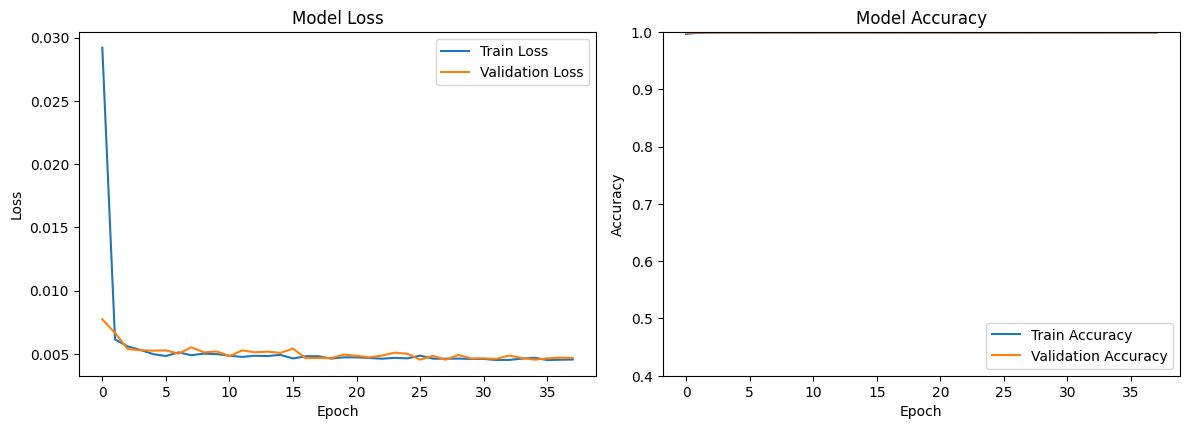

In [ ]:
import matplotlib.pyplot as plt

history = mlp_history.history

# Plot training & validation loss values
plt.figure(figsize=(12, 12))
plt.subplot(321)
plt.plot(history['loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

# Plot training & validation accuracy values
plt.subplot(322)
plt.plot(history['accuracy'], label='Train Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.ylim(0.4, 1.0)  # Adjusted upper limit to 1.0 as accuracy should not exceed 1
plt.legend(loc='lower right')

plt.tight_layout()  # This can help prevent overlap of elements
plt.show()


1781/1781 [==============================] - 3s 2ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.82      0.66      0.73        98

    accuracy                           1.00     56962
   macro avg       0.91      0.83      0.87     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix:
[[56850    14]
 [   33    65]]
ROC AUC Score: 0.9567954116086501


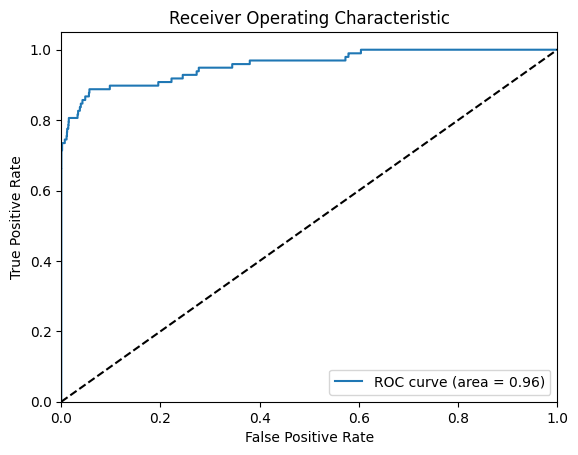

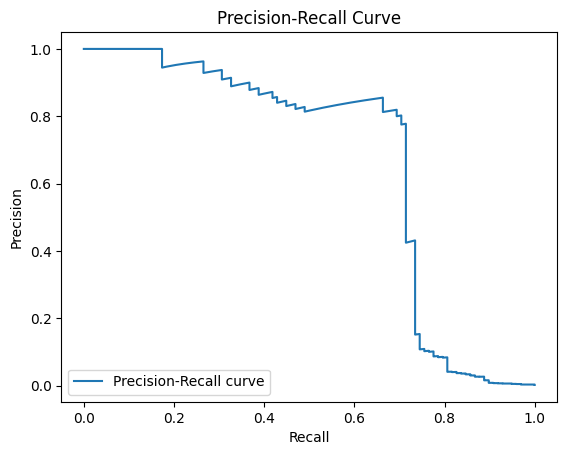

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt

# Predict probabilities for the test set
y_pred_probs = mlp_classifier.predict(X_test_encoded)

# Predict classes based on a threshold
threshold = 0.5  # This threshold can be adjusted based on the precision-recall trade-offs
y_pred = (y_pred_probs >= threshold).astype(int)

# Calculate different metrics
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_probs))

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_probs)
plt.figure()
plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()


1781/1781 [==============================] - 6s 4ms/step
Confusion Matrix:
 [[56850    14]
 [   33    65]]


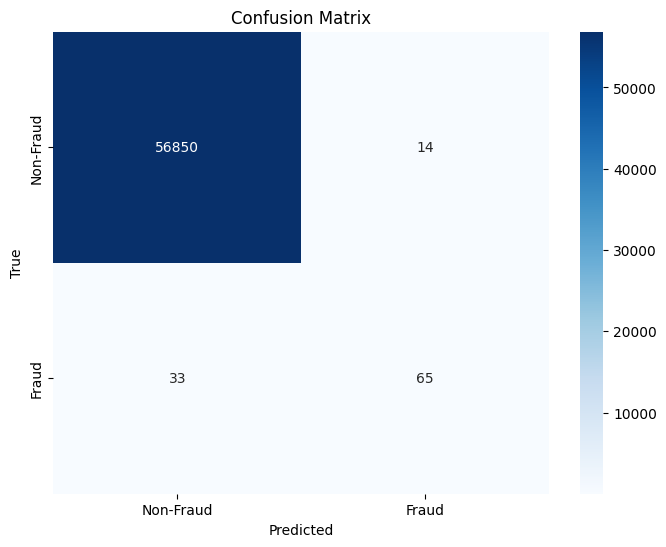

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.82      0.66      0.73        98

    accuracy                           1.00     56962
   macro avg       0.91      0.83      0.87     56962
weighted avg       1.00      1.00      1.00     56962



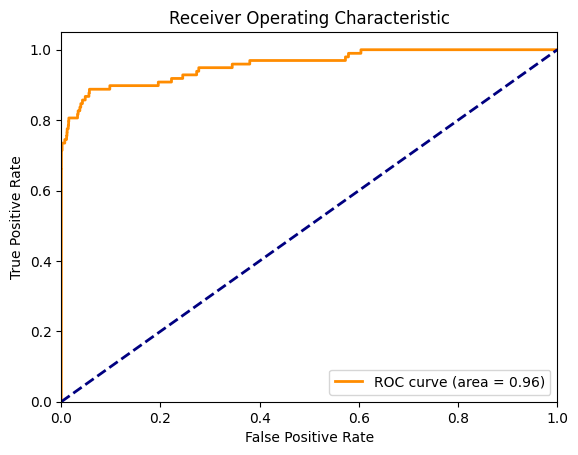

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt


# Load the model
model = load_model('mlp_model.h5')

# # Predict probabilities
y_pred_probs = model.predict(X_test_encoded)
y_pred = (y_pred_probs > 0.5).astype(int)  # Using threshold of 0.5, adjust as needed

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Plotting confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print(classification_report(y_test, y_pred))

# Optional: Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
